In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#import helper

import matplotlib.pyplot as plt
from torchvision import datasets , transforms

In [2]:
#Loading and pre-processing the dataset 

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [12]:
#Model Definition
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # defining first hidden layer with output 1024
        self.linear1 = nn.Linear(784,1024)
        self.linear2 = nn.Linear(1024,512)
        self.linear3 = nn.Linear(512,256)
        self.linear4 = nn.Linear(256,128)
        self.linear5 = nn.Linear(128,10)
    
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = F.log_softmax(self.linear5(x),dim=1)
        return x
model= Net()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [13]:
# Epoch definition
Epochs=15
for i in range(Epochs):
    running_loss=0
    for images,labels in trainloader:
        #images =images.to(device)
        #labels =labels.to(device)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        running_loss += loss
        optimizer.step()
    print("Average loss in Epoch:",i+1,running_loss/len(trainloader))

Average loss in Epoch: 1 tensor(1.5576, grad_fn=<DivBackward0>)
Average loss in Epoch: 2 tensor(0.6485, grad_fn=<DivBackward0>)
Average loss in Epoch: 3 tensor(0.5419, grad_fn=<DivBackward0>)
Average loss in Epoch: 4 tensor(0.4836, grad_fn=<DivBackward0>)
Average loss in Epoch: 5 tensor(0.4461, grad_fn=<DivBackward0>)
Average loss in Epoch: 6 tensor(0.4181, grad_fn=<DivBackward0>)
Average loss in Epoch: 7 tensor(0.3958, grad_fn=<DivBackward0>)
Average loss in Epoch: 8 tensor(0.3757, grad_fn=<DivBackward0>)
Average loss in Epoch: 9 tensor(0.3621, grad_fn=<DivBackward0>)
Average loss in Epoch: 10 tensor(0.3476, grad_fn=<DivBackward0>)
Average loss in Epoch: 11 tensor(0.3356, grad_fn=<DivBackward0>)
Average loss in Epoch: 12 tensor(0.3244, grad_fn=<DivBackward0>)
Average loss in Epoch: 13 tensor(0.3143, grad_fn=<DivBackward0>)
Average loss in Epoch: 14 tensor(0.3053, grad_fn=<DivBackward0>)
Average loss in Epoch: 15 tensor(0.2970, grad_fn=<DivBackward0>)


In [16]:
#Testing Accuracy on the Validation set 
test_iter = iter(testloader)
images,labels = test_iter.next()
ps = torch.exp(model(images))
print(ps.shape)
max_score,pred_class = ps.topk(1,dim=1) #the first argument is k and topk method returns first k top values and their corresponding indices

equals = pred_class.squeeze() == labels #shape of labels is 64 while pred_class is (64,1) hence making same for elememt-wise comparision 
print ("Validation Accuracy is",torch.mean(equals.type(torch.FloatTensor)).item()*100,"%") #converting type of equals from boolean to float to calculate the mean 

torch.Size([64, 10])
Validation Accuracy is 89.0625 %


In [17]:
#Calculating Accuracy for whole Validation set
accuracy=[] 
for images,labels in testloader:
    ps = torch.exp(model(images))
    max_score,pred_class=ps.topk(1,dim=1)
    
    equals =  pred_class.squeeze() == labels
    accuracy.append(torch.mean(equals.type(torch.FloatTensor)).item()*100)
Validation_Accuracy = sum(accuracy)/len(accuracy)
print("Validation Accuracy is",Validation_Accuracy,"%")

Validation Accuracy is 87.58957006369427 %


In [18]:
print(accuracy)

[90.625, 78.125, 82.8125, 87.5, 81.25, 84.375, 89.0625, 87.5, 81.25, 90.625, 92.1875, 84.375, 90.625, 85.9375, 85.9375, 85.9375, 90.625, 82.8125, 93.75, 96.875, 84.375, 81.25, 81.25, 90.625, 82.8125, 87.5, 92.1875, 81.25, 90.625, 92.1875, 85.9375, 95.3125, 82.8125, 89.0625, 90.625, 96.875, 82.8125, 85.9375, 95.3125, 87.5, 87.5, 76.5625, 92.1875, 90.625, 92.1875, 90.625, 82.8125, 81.25, 81.25, 89.0625, 85.9375, 85.9375, 90.625, 89.0625, 82.8125, 93.75, 81.25, 87.5, 87.5, 82.8125, 81.25, 85.9375, 82.8125, 92.1875, 87.5, 90.625, 93.75, 84.375, 87.5, 82.8125, 82.8125, 92.1875, 90.625, 82.8125, 89.0625, 92.1875, 87.5, 90.625, 84.375, 92.1875, 85.9375, 92.1875, 85.9375, 81.25, 92.1875, 89.0625, 81.25, 82.8125, 87.5, 82.8125, 87.5, 85.9375, 92.1875, 92.1875, 87.5, 87.5, 93.75, 85.9375, 81.25, 92.1875, 82.8125, 90.625, 78.125, 92.1875, 87.5, 93.75, 78.125, 79.6875, 82.8125, 85.9375, 87.5, 87.5, 92.1875, 90.625, 93.75, 92.1875, 87.5, 93.75, 92.1875, 89.0625, 92.1875, 89.0625, 92.1875, 90.625, 8

In [22]:
# Implementation by Udacity

model= Net()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

Epochs=50
train_losses,test_losses = [],[]
for i in range(Epochs):
    tot_train_loss=0
    for images,labels in trainloader:
        #images =images.to(device)
        #labels =labels.to(device)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        tot_train_loss += loss
        optimizer.step()
    else:
        tot_test_loss = 0
        test_correct = 0
        
        with torch.no_grad(): #By turning the gradients off we save the memory and computations
            for images,labels in testloader:
                log_ps = model(images)
                loss = criterion(log_ps,labels)
                tot_test_loss += loss.item()
                
                ps = torch.exp(model(images))
                max_score,pred_class=ps.topk(1,dim=1)
                equals =  pred_class.squeeze() == labels
                test_correct += equals.sum().item()
        #On Epoch Completion for train and test set 
        
        # Calculate mean loss for train and test set for this epoch
        train_loss = tot_train_loss/len(trainloader.dataset)
        test_loss = tot_test_loss/len(testloader.dataset)
        
        #Store the losses in the list 
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        print("Epoch: {}/{}..".format(i+1,Epochs),
              "Training Loss: {:.3f}..".format(train_loss),
              "Test Loss: {:.3f}..".format(test_loss),
              "Test_Accuracy: {:.3f}..".format(test_correct/len(testloader.dataset)))
              
       

Epoch: 1/50.. Training Loss: 0.025.. Test Loss: 0.013.. Test_Accuracy: 0.697..
Epoch: 2/50.. Training Loss: 0.010.. Test Loss: 0.010.. Test_Accuracy: 0.765..
Epoch: 3/50.. Training Loss: 0.009.. Test Loss: 0.009.. Test_Accuracy: 0.798..
Epoch: 4/50.. Training Loss: 0.008.. Test Loss: 0.008.. Test_Accuracy: 0.810..
Epoch: 5/50.. Training Loss: 0.007.. Test Loss: 0.008.. Test_Accuracy: 0.809..
Epoch: 6/50.. Training Loss: 0.007.. Test Loss: 0.009.. Test_Accuracy: 0.786..
Epoch: 7/50.. Training Loss: 0.006.. Test Loss: 0.007.. Test_Accuracy: 0.834..
Epoch: 8/50.. Training Loss: 0.006.. Test Loss: 0.006.. Test_Accuracy: 0.854..
Epoch: 9/50.. Training Loss: 0.006.. Test Loss: 0.006.. Test_Accuracy: 0.849..
Epoch: 10/50.. Training Loss: 0.005.. Test Loss: 0.006.. Test_Accuracy: 0.855..
Epoch: 11/50.. Training Loss: 0.005.. Test Loss: 0.006.. Test_Accuracy: 0.852..
Epoch: 12/50.. Training Loss: 0.005.. Test Loss: 0.007.. Test_Accuracy: 0.856..
Epoch: 13/50.. Training Loss: 0.005.. Test Loss: 

## Overfitting

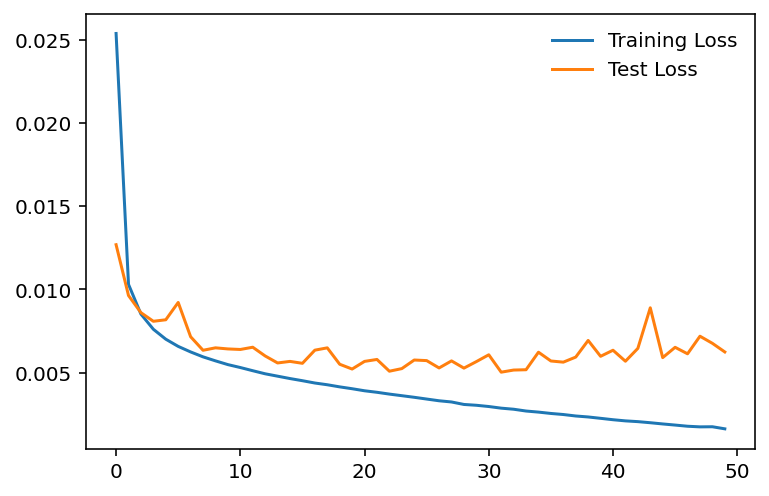

In [23]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend(frameon=False)

 For early stopping we do nothing we just save models and choose the model which has lowest validation losss

# Dropout 

In [3]:
#Model Definition
class Net_dropout(nn.Module):
    def __init__(self):
        super().__init__()
        # defining first hidden layer with output 1024
        self.linear1 = nn.Linear(784,1024)
        self.linear2 = nn.Linear(1024,512)
        self.linear3 = nn.Linear(512,256)
        self.linear4 = nn.Linear(256,128)
        self.linear5 = nn.Linear(128,10)
        
        self.dropout = nn.Dropout(p=0.5)
    
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = self.dropout(F.relu(self.linear1(x)))
        x = self.dropout(F.relu(self.linear2(x)))
        x = self.dropout(F.relu(self.linear3(x)))
        x = self.dropout(F.relu(self.linear4(x)))
        x = F.log_softmax(self.linear5(x),dim=1)
        return x
model= Net_dropout()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [4]:
#Training and Testing Epochs
Epochs=2
train_losses,test_losses = [],[]
for i in range(Epochs):
    tot_train_loss=0
    for images,labels in trainloader:
        #images =images.to(device)
        #labels =labels.to(device)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        tot_train_loss += loss
        optimizer.step()
    else:
        tot_test_loss = 0
        test_correct = 0
        
        with torch.no_grad(): #By turning the gradients off we save the memory and computations
            model.eval()  # To make the network aware of the dropouts to be nullified in testing
            for images,labels in testloader:
                log_ps = model(images)
                loss = criterion(log_ps,labels)
                tot_test_loss += loss.item()
                
                ps = torch.exp(model(images))
                max_score,pred_class=ps.topk(1,dim=1)
                equals =  pred_class.squeeze() == labels
                test_correct += equals.sum().item()
        #On Epoch Completion for train and test set 
        
        # Calculate mean loss for train and test set for this epoch
        train_loss = tot_train_loss/len(trainloader.dataset)
        test_loss = tot_test_loss/len(testloader.dataset)
        
        #Store the losses in the list 
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        print("Epoch: {}/{}..".format(i+1,Epochs),
              "Training Loss: {:.3f}..".format(train_loss),
              "Test Loss: {:.3f}..".format(test_loss),
              "Test_Accuracy: {:.3f}..".format(test_correct/len(testloader.dataset)))
        model.train()  #To make model again in training mode to apply dropout

Epoch: 1/2.. Training Loss: 0.032.. Test Loss: 0.020.. Test_Accuracy: 0.536..
Epoch: 2/2.. Training Loss: 0.018.. Test Loss: 0.013.. Test_Accuracy: 0.695..


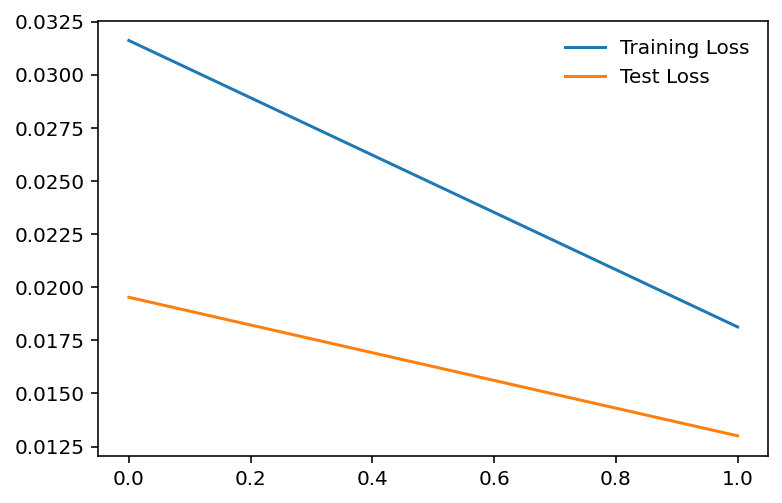

In [5]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend(frameon=False)

In [6]:
print("Trained Model::\n\n",model)
print("State dict keys are: \n\n",model.state_dict().keys())


Trained Model::

 Net_dropout(
  (linear1): Linear(in_features=784, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=256, bias=True)
  (linear4): Linear(in_features=256, out_features=128, bias=True)
  (linear5): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
State dict keys are: 

 odict_keys(['linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias', 'linear3.weight', 'linear3.bias', 'linear4.weight', 'linear4.bias', 'linear5.weight', 'linear5.bias'])


In [7]:
# Saving and retrieving the model
torch.save(model.state_dict(),'check_point1.pth')

state = torch.load('check_point1.pth')

model.load_state_dict(state)
# loading to model occurs only if the architecture of the model is completely same as the model being loaded

<All keys matched successfully>

In [8]:
# For Defining a model to match with a given checkpoint
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

AttributeError: 'Net_dropout' object has no attribute 'hidden_layers'

In [9]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model
model = load_checkpoint('checkpoint.pth')
print(model)